# Modul 99-3 Lineare Algebra

Eine Schulungsserie der Meetup-Gruppe **[Quantum Computing meets Business - Rhineland](https://www.meetup.com/de-DE/Quantum-Computing-meets-Business-Rhineland/)**

(Adapted from [qiskit-textbook](https://github.com/qiskit-community/qiskit-textbook))

Themen:

- Vektoren und Vektorräume (#vectors)
- Matrizen und Matrix-Operatoren (#matrices)
- Lineare Abhängigkeit und Basen (#dependence)
- Hilbert-Räume, Orthonormalität und das innere Produkt (#hilbert)
- Äußere Produkte und Tensorprodukte (#tensorproduct)
- Eigenvektoren und Eigenwerte (#eigen)
- Matrix Exponentiale (#expo)

In [6]:
%run 00-Inhalt_Tools.ipynb

In [7]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_vector

### Einführung

Lineare Algebra ist die Sprache des Quantencomputings. Es ist daher entscheidend, ein gutes Verständnis der grundlegenden mathematischen Konzepte zu entwickeln, auf denen die lineare Algebra aufbaut, um zu vielen der erstaunlichen und interessanten Konstruktionen zu gelangen, die man in der Quantenberechnung sieht. Das Ziel dieses Abschnitts ist es, ein Fundament an einführenden Kenntnissen der linearen Algebra zu schaffen, auf dem der Leser während seines Studiums des Quantencomputers aufbauen kann.

### Vektoren und Vektorräume <a id="vectors"></a>

Wir beginnen unsere Untersuchung der einführenden linearen Algebra, indem wir zunächst eine der wichtigsten mathematischen Größen in der Quantenberechnung besprechen: den Vektor.

Formal ist ein **Vektor** $|v\rangle$ als Elemente einer Menge definiert, die als Vektorraum bekannt ist. Eine intuitivere und geometrischere Definition lautet, dass ein Vektor "eine mathematische Größe mit sowohl Richtung als auch Betrag" ist. Betrachten Sie zum Beispiel einen Vektor mit $x$ und $y$ Komponenten der Form $\begin{pmatrix} 3 \\ 5 \end{pmatrix}$. Dieser Vektor kann als Pfeil dargestellt werden, der in die Richtung von $3$ Einheiten nach unten auf der $x$-Achse und $5$ Einheiten nach oben auf der $y$-Achse zeigt:

/Applications/anaconda3/envs/qcmb-training/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


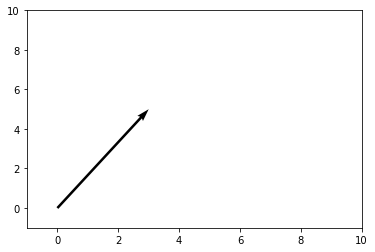

In [4]:
plt.figure()
ax = plt.gca()
ax.quiver([3], [5], angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()

Beachten Sie, dass der "Schwanz" des Vektors nicht am Ursprung positioniert sein muss; er muss nur in die richtige Richtung zeigen. 

Im Quantencomputing haben wir oft mit **Zustandsvektoren** zu tun, die einfach Vektoren sind, die auf einen bestimmten Punkt im Raum zeigen, der einem bestimmten Quantenzustand entspricht. Dies kann mit Hilfe einer Bloch-Kugel visualisiert werden. Ein Vektor, der den Zustand eines Quantensystems repräsentiert, könnte zum Beispiel so aussehen wie dieser Pfeil, eingeschlossen in die Bloch-Kugel, die den sogenannten "Zustandsraum" aller möglichen Punkte darstellt, auf die unsere Zustandsvektoren "zeigen" können:

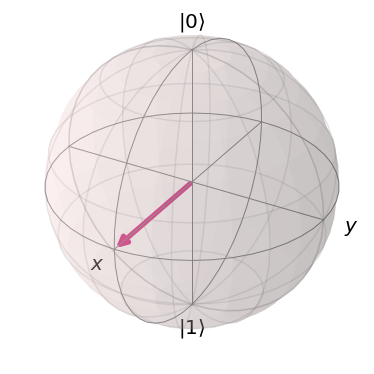

In [8]:
plot_bloch_vector([1, 0, 0])

Dieser spezielle Zustand entspricht einer geraden Superposition zwischen $|0\rangle$ und $|1\rangle$ (der Pfeil befindet sich auf halber Strecke zwischen $|0\rangle$ am oberen und $|1\rangle$ am unteren Ende der Kugel). Unsere Vektoren dürfen an jeder Stelle der Kugeloberfläche rotieren, und jeder dieser Punkte repräsentiert einen anderen Quantenzustand.

Gehen wir noch einmal auf unsere formalere Definition eines Vektors ein, die lautet, dass ein Vektor ein Element eines Vektorraums ist. Wir müssen nun einen Vektorraum definieren. Ein **Vektorraum** $V$ über einem **Feld** $F$ ist eine Menge von Objekten (Vektoren), für die zwei Bedingungen gelten. Erstens ergibt die **Vektoraddition** zweier Vektoren $|a\rangle$, $|b\rangle$ in $V$ einen dritten Vektor $|a\rangle \ + \ |b\rangle \ = \ |c\rangle$, der ebenfalls in $V$ enthalten ist. Die zweite Bedingung ist, dass die **Skalarmultiplikation** zwischen irgendeinem $|a\rangle \ in \ V$ und irgendeinem $n \ in \ F$, bezeichnet mit $n|a\rangle$, ebenfalls in $V$ enthalten ist.

Wir werden diese vorherige Definition nun anhand eines einfachen Beispiels verdeutlichen. Wir wollen zeigen, dass die Menge $\mathbb{R}^2$ über dem Feld $\mathbb{R}$ ein Vektorraum ist. Wir behaupten, dass

<br>

$$\begin{pmatrix} x_1 \\ y_1 \end{pmatrix} \ + \ \begin{pmatrix} x_2 \\ y_2 \end{pmatrix} \ = \ \begin{pmatrix} x_1 \ + \ x_2 \\ y_1 \ + \ y_2 \end{pmatrix}$$

<br>

in $\mathbb{R}^2$ enthalten ist. Dies ist offensichtlich der Fall, da die Summe zweier reeller Zahlen eine reelle Zahl ist und somit beide Komponenten des neu gebildeten Vektors reelle Zahlen sind; der Vektor ist also per Definition in $\mathbb{R}^2$ enthalten. Wir behaupten auch, dass:

<br>

$$n |v\rangle \ = \ \begin{pmatrix} nx \\ ny \end{pmatrix} \ \in \ V \ \ \ \ \forall n \ \in \ \mathbb{R}$$

<br>

Dies ist ebenfalls wahr, da das Produkt aus einer reellen Zahl und einer reellen Zahl eine reelle Zahl ist, was den gesamten neuen Vektor reell macht und somit diese Aussage beweist.

### Matrizen und Matrixoperationen <a id="matrices"></a>

Wenden wir uns nun einem weiteren grundlegenden Konzept zu: einer **Matrix**. Matrizen sind mathematische Objekte, die Vektoren in andere Vektoren transformieren:

<br>

$$|v\rangle \ \rightarrow \ |v'\rangle \ = \ M |v\rangle$$

<br>

Im Allgemeinen werden Matrizen als "Arrays" von Zahlen geschrieben, die etwa so aussehen:

<br>

$$M \ = \ \begin{pmatrix} 1 & -2 & 3 \\ 1 & 5i & 0 \\ 1 \ + \ i & 7 & -4 \end{pmatrix}$$

<br>

Wir können eine Matrix auf einen Vektor "anwenden", indem wir eine Matrixmultiplikation durchführen. Im Allgemeinen wird bei der Matrixmultiplikation zwischen zwei Matrizen die erste Zeile der ersten Matrix genommen und jedes Element mit seinem "Partner" in der ersten Spalte der zweiten Matrix multipliziert (die erste Zahl der Zeile wird mit der ersten Zahl der Spalte multipliziert, die zweite Zahl der Zeile und die zweite Zahl der Spalte, usw.). Die Summe dieser neuen Zahlen wird das erste Element der ersten Zeile der neuen Matrix. Um den Rest der ersten Zeile aufzufüllen, wiederholen wir diesen Vorgang für die zweite, dritte usw. Spalte der zweiten Matrix. Dann nehmen wir die zweite Zeile der ersten Matrix und wiederholen den Vorgang für jede Spalte der zweiten Matrix, um die zweite Zeile zu erzeugen. Wir führen diesen Prozess durch, bis wir alle Zeilen der ersten Matrix verwendet haben. Die resultierende Matrix ist unsere neue Matrix. Hier ist ein Beispiel:

<br>

$$\begin{pmatrix} 2 & 0 \\ 5 & -1 \end{pmatrix} \begin{pmatrix} -3 & 1 \\ 2 & 1 \end{pmatrix} \ = \ \begin{pmatrix} (2)(-3) + (0)(2) & (2)(1) \ + \ (0)(1) \\ (5)(-3) + (-1)(2) & (5)(1) \ + \ (-1)(1) \end{pmatrix} \ = \ \begin{pmatrix} -6 & 2 \\ -17 & 4 \end{pmatrix}$$

<br>

Um eine Quantenberechnung durchzuführen, haben wir einen Quantenzustandsvektor, den wir manipulieren, indem wir eine Matrix auf diesen Vektor anwenden. Ein Vektor ist einfach eine Matrix mit einer Spalte. Um eine Matrix auf einen Vektor anzuwenden, folgen wir also demselben Verfahren der Matrixmultiplikation wie oben beschrieben. Wir manipulieren Qubits in unserem Quantencomputer, indem wir Sequenzen von **Quantengattern** anwenden. Jedes Quantengatter kann als eine Matrix ausgedrückt werden, die auf Zustandsvektoren angewendet werden kann und so den Zustand verändert. Ein häufig anzutreffendes Quantengatter ist zum Beispiel das Pauli-X-Gatter, das durch die folgende Matrix dargestellt wird:

<br>

$$\sigma_x \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

<br>

Dieses Gatter wirkt ähnlich wie das klassische NOT-Logikgatter. Es bildet den rechnerischen Basiszustand $|0\rangle$ auf $|1\rangle$ und $|1\rangle$ auf $|0\rangle$ ab (es "flippt" den Zustand). Wir schreiben die beiden Basiszustände als Spaltenvektoren:

<br>

$$|0\rangle \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ \ \ \ \ \ \ |1\rangle \ = \ \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

<br>

Wenn wir diese Matrix auf jeden der Vektoren anwenden:

<br>

$$\sigma_x |0\rangle \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ = \ \begin{pmatrix} (0)(1) \ + \ (1)(0) \\ (1)(1) \ + \ (0)(0) \end{pmatrix} \ = \ \begin{pmatrix} 0 \\ 1 \end{pmatrix} \ = \ |1\rangle$$

<br>

$$\sigma_x |1\rangle \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} \ = \ \begin{pmatrix} (0)(0) \ + \ (1)(1) \\ (1)(0) \ + \ (0)(1) \end{pmatrix} \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ = \ |0\rangle$$

<br>

Die Matrix wirkt wie erwartet auf die Zustandsvektoren.

In der Quantenberechnung treffen wir häufig auf zwei wichtige Arten von Matrizen: **Hermitesche** und **Unitäre** Matrizen. Erstere ist im Studium der Quantenmechanik wichtiger, muss aber dennoch im Studium der Quantenberechnung diskutiert werden. Letztere ist sowohl in der Quantenmechanik als auch in der Quantenberechnung von unübertroffener Bedeutung. Wenn Sie nur ein Konzept aus diesem Abschnitt über lineare Algebra mitnehmen, dann sollte es das Konzept einer unitären Matrix sein.

Eine hermitesche Matrix ist einfach eine Matrix, die gleich ihrer **konjugierten Transponierten** ist (bezeichnet mit einem $\dagger$-Symbol).  Das bedeutet, dass das Umkehren des Vorzeichens der imaginären Komponenten einer hermiteschen Matrix und das anschließende Spiegeln der Einträge entlang der Hauptdiagonale (von der linken oberen bis zur rechten unteren Ecke) eine gleiche Matrix ergibt. Zum Beispiel ist die Pauli-Y-Matrix, die häufig in der Quantenberechnung verwendet wird, hermitisch:

<br>

$$\sigma_y \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ \Rightarrow \ \sigma_y^{\dagger} \ = \ \begin{pmatrix} 0 & -(i) \\ -(-i) & 0 \end{pmatrix} \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ = \ \sigma_y$$

<br>

Beachten Sie, wie wir die Stellen der $i$ und der $-i$ vertauscht haben (während wir über die Hauptdiagonale spiegeln, bleiben die Nullen unverändert), und dann das Vorzeichen umgedreht haben. 

Eine unitäre Matrix ist sehr ähnlich. Genauer gesagt ist es eine Matrix, bei der die **Inverse Matrix** gleich der konjugierten Transponierten der ursprünglichen Matrix ist.

Die Inverse einer Matrix $A$, bezeichnet als $A^{-1}$, ist eine solche Matrix, dass:

<br>

$$A^{-1} A \ = \ A A^{-1} \ = \ \mathbb{I}$$

<br>

wobei $\mathbb{I}$ die Identitätsmatrix ist. Die Identitätsmatrix hat $1$s entlang der Hauptdiagonale (von links oben nach rechts unten), und $0$s an allen anderen Stellen. Sie wird Identitätsmatrix genannt, weil sie trivial auf jede andere Matrix wirkt (sie hat keine Auswirkung). Sie können dies selbst beweisen, indem Sie eine Identitätsmatrix mit einer beliebigen anderen Matrix multiplizieren.  

Wenn Matrizen größer als $2 \text{ mal } 2$ werden, wird die Berechnung der Inversen so kompliziert, dass sie normalerweise dem Computer überlassen wird. Für eine $2 \text{ mal } 2$-Matrix ist die Inverse wie folgt definiert:

<br>

$$A \ = \ \begin{pmatrix} a & b \\ c & d \end{pmatrix} \ \Rightarrow \ A^{-1} \ = \ \frac{1}{\text{det} \ A} \begin{pmatrix} d & -b \\ -c & a \end{pmatrix},$$

<br>

wobei $\text{det} \ A$ die **Determinante** der Matrix ist. Im Fall $2 \ \mal \ 2$ ist $\text{det} \ A \ = \ ad \ - \ bc$.

Die Berechnung von inversen Matrizen ist in der Quanteninformatik selten wichtig. Da die meisten Matrizen, denen wir begegnen, unitär sind, können wir davon ausgehen, dass die Inverse einfach durch die konjugierte Transponierung gegeben ist.

Schauen wir uns ein grundlegendes Beispiel an. Die Pauli-Y-Matrix ist nicht nur hermitesch, sondern auch unitär (sie ist gleich ihrer konjugierten Transponierten, die wiederum gleich ihrer Inversen ist; die Pauli-Y-Matrix ist also ihre eigene Inverse!) Wir können überprüfen, dass diese Matrix tatsächlich unitär ist:

<br>

$$\sigma_y \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ \ \ \ \ \sigma_y^{\dagger} \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ \Rightarrow \ \sigma_y^{\dagger} \sigma_y \ = \ \begin{pmatrix} (0)(0) + (-i)(i) & (0)(-i) \ + \ (-i)(0) \\ (i)(0) \ + \ (0)(i) &  (i)(-i) \ + \ (0)(0) \end{pmatrix} \ = \ \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \ = \ \mathbb{I}$$

<br>

Der Grund, warum unitäre Matrizen wichtig sind, wird im Abschnitt über Hilbert-Räume und mehr noch im Unterthema Quantenmechanik dieses Lehrbuchs deutlicher werden. Die Grundidee ist, dass die Entwicklung eines Quantenzustands durch Anwendung einer unitären Matrix die Norm (Größe) des Quantenzustands "bewahrt".

### Lineare Abhängigkeit und Basen <a id="dependence"></a>

Wir sind nun in der Lage, die Konstruktion von Vektorräumen zu diskutieren. Betrachten wir einen Vektorraum $V$. Wir sagen, dass eine Menge von Vektoren $S$ einen Unterraum $V_S \ Untermenge \ V$ (unter Vektorraumoperationen geschlossene Untermenge) des Vektorraums aufspannt, wenn wir jeden Vektor im Unterraum als **lineare Kombination** von Vektoren schreiben können, die in der aufspannenden Menge enthalten sind. 

Eine Linearkombination einiger Sammelvektoren $|v_1\rangle, \ ..., \ |v_n\rangle$ in einem Vektorraum über einem Feld $F$ ist definiert als eine beliebige Summe dieser Vektoren (die natürlich ein anderer Vektor sein wird, den wir $|v\rangle$ nennen werden):

<br>

$$|v\rangle \ = \ f_1 |v_1\rangle \ + \ f_2 |v_2\rangle \ + \ ... \ + \ f_n |v_n\rangle \ = \ \displaystyle\sum_{i} \ f_i |v_i\rangle$$

<br>

wobei jedes $f_i$ ein Element von $F$ ist. Wenn wir eine Menge von Vektoren haben, die einen Raum aufspannt, sagen wir, dass **jeder andere Vektor** in diesem Vektorraum als Linearkombination dieser Vektoren geschrieben werden kann.

Eine Menge von Vektoren $|v_1\rangle, \ ..., \ |v_n\rangle$ heißt **linear abhängig**, wenn es für jeden Vektor $b_i \ in \ F$ entsprechende Koeffizienten gibt, so dass:

<br>

$$b_1 |v_1\rangle \ + \ b_2 |v_2\rangle \ + \ ... \ + \ b_n |v_n\rangle \ = \ \displaystyle\sum_{i} \ b_i |v_i\rangle \ = \ 0,$$

<br>

wobei mindestens einer der $b_i$-Koeffizienten ungleich Null ist. Dies ist äquivalent zu der intuitiveren Aussage, dass "die Menge der Vektoren als Linearkombinationen voneinander ausgedrückt werden kann". Nehmen wir zum Beispiel die Menge $\{|v_1, \ ..., \ |v_n \}$ zusammen mit den entsprechenden Koeffizienten $\{b_1, \ ..., \ b_n \}$, so dass die Linearkombination gleich $0$ ist. Da es mindestens einen Vektor mit einem Nicht-Null-Koeffizienten gibt, wählen wir einen Term in der Linearkombination $b_a |v_a\rangle$:

<br>

$$\displaystyle\sum_{i} \ b_i |v_i\rangle \ = \ b_a |v_a\rangle \ + \ \displaystyle\sum_{i, \ i \ \neq \ a} \ b_i |v_i\rangle \ = \ 0 \ \Rightarrow \ |v_a\rangle \ = \ - \displaystyle\sum_{i, \ i \ \neq \ a} \ \frac{b_i}{b_a} |v_i\rangle \ = \ \displaystyle\sum_{i, \ i \ \neq \ a} \ c_i |v_i\rangle$$

<br>

Für den Fall, dass $b_a$ der einzige Nicht-Null-Koeffizient ist, gilt notwendigerweise, dass $|v_a\rangle$ der Nullvektor ist, wodurch die Menge automatisch linear abhängig wird. Ist dies nicht der Fall, so wurde $|v_a\rangle$ als Linearkombination von Nicht-Null-Vektoren geschrieben, wie oben gezeigt wurde. Um die Umkehrung zu beweisen, nehmen wir an, dass es einen Vektor $|v_a\rangle$ im Unterraum $|v_1\rangle, ..., \ |v_n\rangle$ gibt, der als Linearkombination anderer Vektoren im Unterraum geschrieben werden kann. Dies bedeutet, dass:

<br>

$$|v_a\rangle \ = \ \displaystyle\sum_{s} b_s |v_s\rangle$$

<br>

wobei $s$ ein Index ist, der über eine Teilmenge des Unterraums läuft. Daraus folgt, dass:

<br>

$$|v_a\rangle \ - \ \displaystyle\sum_{s} b_s |v_s\rangle \ = \ |v_a\rangle \ - \ (b_1|v_{s_1}\rangle \ + \ ... \ + \ b_r|v_{s_r}\rangle) \ = \ 0$$

<br>

Für alle Vektoren im Unterraum, die nicht in der mit $s$ indizierten Teilmenge enthalten sind, setzen wir ihre mit $q$ indizierten Koeffizienten gleich $0$. Somit,

<br>

$$|v_a\rangle \ - \ (b_1|v_{s_1}\rangle \ + \ ... \ + \ b_r|v_{s_r}\rangle) \ + \ (0)(|v_{q_1}\rangle \ + \ ... \ + \ |v_{q_t}\rangle) \ = \ 0$$

<br>

was eine Linearkombination aller Elemente im Unterraum $|v_1\rangle, \ ..., \ |v_n\rangle$ ist. Diese ist gleich $0$, womit der Beweis, dass sich die beiden Definitionen der linearen Abhängigkeit gegenseitig implizieren, abgeschlossen ist.

Betrachten wir nun ein einfaches Beispiel. Betrachten wir die Menge von zwei Vektoren in $\mathbb{R}^2$, bestehend aus $|a\rangle \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ und $|b\rangle \ = \ \begin{pmatrix} 2 \\ 0 \end{pmatrix}$. Wenn wir das Feld über unserem Vektorraum als $\mathbb{R}$ wählen, dann können wir eine Linearkombination dieser Vektoren bilden, die gleich $0$ ist. Ein Beispiel:

<br>

$$2|a\rangle \ - \ |b\rangle \ = \ 0$$

<br>

Eine Menge von Vektoren wird als **linear unabhängig** bezeichnet, wenn es keinen Vektor in der Menge gibt, der als Linearkombination aller anderen ausgedrückt werden kann.

Der Begriff der **Basis** ist einfach eine **linear unabhängige Spannenmenge**. In diesem Sinne ist die Basis eines Vektorraums die minimal mögliche Menge, die den gesamten Raum aufspannt. Wir nennen die Größe der Basismenge die **Dimension** des Vektorraums.

Basen und aufspannende Mengen sind wichtig, weil sie uns erlauben, Vektorräume zu "schrumpfen" und sie in Form von nur wenigen Vektoren auszudrücken. Wir können zu bestimmten Schlussfolgerungen über unsere Basismenge kommen, die wir auf den gesamten Vektorraum verallgemeinern können, einfach weil wir wissen, dass jeder Vektor im Raum nur eine Linearkombination der Basisvektoren ist. 

In der Quantenberechnung ist eine der Basen, die uns oft begegnen, $|0\rangle, \ |1\rangle$. Wir können jeden anderen Qubit-Zustand als eine Linearkombination dieser Basisvektoren schreiben. Zum Beispiel ist die Linearkombination

<br>

$$\frac{|0\rangle \ + \ |1\rangle}{\sqrt{2}}$$

<br>

stellt eine Superposition zwischen dem $|0\rangle$- und $|1\rangle$-Basiszustand dar, mit gleicher Wahrscheinlichkeit, dass der Zustand in einem der beiden Basisvektorzustände gemessen wird (dies ist intuitiv, da das "Gewicht" oder die "Menge jedes Basisvektors" in der Linearkombination gleich ist, da beide mit $1/\sqrt{2}$ skaliert sind).

### Hilbert-Räume, Orthonormalität und das innere Produkt <a id="hilbert"></a>

Hilbert-Räume sind eines der wichtigsten mathematischen Konstrukte in der Quantenmechanik und Quantenberechnung. Einen Hilbert-Raum kann man sich als den Zustandsraum vorstellen, in dem alle Quantenzustandsvektoren "leben". Der Hauptunterschied zwischen einem Hilbert-Raum und einem beliebigen Vektorraum ist, dass ein Hilbert-Raum mit einem **inneren Produkt** ausgestattet ist, das eine Operation ist, die zwischen zwei Vektoren durchgeführt werden kann und einen Skalar zurückgibt. 

Im Kontext der Quantenmechanik und der Quantenberechnung liefert das innere Produkt zwischen zwei Zustandsvektoren eine skalare Größe, die den Betrag darstellt, zu dem der erste Vektor entlang des zweiten Vektors liegt. Daraus lassen sich u. a. die Wahrscheinlichkeiten der Messung in verschiedenen Quantenzuständen berechnen (darauf wird im Unterthema Quantenmechanik näher eingegangen). 

Für zwei Vektoren $|a\rangle$ und $|b\rangle$ in einem Hilbert-Raum bezeichnen wir das innere Produkt als $\langle a | b \rangle$, wobei $\langle a |$ gleich der konjugierten Transponierten von $|a\rangle$ ist, bezeichnet mit $|a\rangle^{\dagger}$. Das innere Produkt zwischen zwei Vektoren des Hilbert-Raums sieht also etwa so aus:

<br>

$$\langle a | b \rangle \ = \ \begin{pmatrix} a_1^{*} & a_2^{*} & ... & a_n^{*} \end{pmatrix} \begin{pmatrix} b_1 \\ b_2 \\ . \\ . \\ . \\ b_n \end{pmatrix} \ = \ a_1^{*} b_1 \ + \ a_2^{*} b_2 \ + \ ... \ + \ a_n^{*} b_n$$

<br>

wobei $*$ die komplex Konjugierte des Vektors bezeichnet.

Eine der wichtigsten Bedingungen für einen Hilbert-Raum, der ein Quantensystem darstellt, ist, dass das innere Produkt eines Vektors mit sich selbst gleich eins ist: $\langle \psi | \psi \rangle \ = \ 1$. Dies ist die sogenannte Normalisierungsbedingung, die besagt, dass die Länge des Vektors zum Quadrat (jede Komponente des Vektors wird quadriert und summiert, durch die Definition des inneren Produkts) gleich eins sein muss. Die physikalische Bedeutung davon ist, dass die Länge eines Vektors in einer bestimmten Richtung repräsentativ für die "Wahrscheinlichkeits-Amplitude" des Quantensystems in Bezug auf die Messung in diesem bestimmten Zustand ist. Offensichtlich muss die Wahrscheinlichkeit, dass das Quantensystem in dem Zustand gemessen wird, in dem es sich befindet, $1$ betragen (schließlich muss die Summe der Wahrscheinlichkeiten, das Quantensystem in einem bestimmten Zustand zu finden, gleich $1$ sein).

Betrachten wir nun die Bloch-Kugel:

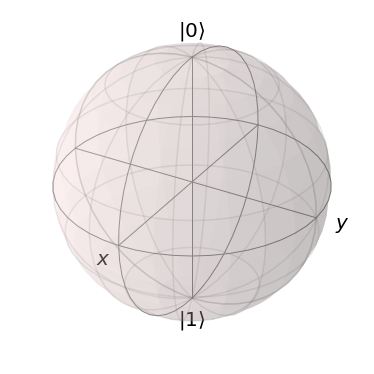

In [4]:
plot_bloch_vector([0, 0, 0])

Die Oberfläche dieser Kugel ist zusammen mit dem inneren Produkt zwischen den Qubitzustandsvektoren ein gültiger Hilbert-Raum. Außerdem gilt die Normalisierungsbedingung, da der Radius der Bloch-Kugel $1$ ist und somit die Länge zum Quadrat jedes Vektors ebenfalls gleich $1$ sein muss.

Eine letzte Anmerkung zu Hilbert-Räumen und dem inneren Produkt ist ihre Beziehung zu **unitären Matrizen**. Unitäre Matrizen sind in der Quantenberechnung wichtig, weil sie das innere Produkt **erhalten**, was bedeutet, dass egal wie man einen Vektor unter einer Folge von unitären Matrizen transformiert, die Normalisierungsbedingung immer noch gilt. Dies kann in dem folgenden kurzen Beweis gezeigt werden:

<br>

$$\langle \psi | \psi \rangle \ = \ 1 \ \Rightarrow \ |\psi\rangle \ \rightarrow \ U |\psi\rangle \ = \ |\psi'\rangle \ \Rightarrow \ \langle \psi' | \psi' \rangle \ = \ (U |\psi\rangle)^{\dagger} U|\psi\rangle \ = \ \langle \psi | U^{\dagger} U |\psi\rangle \ = \ \langle \psi | \psi \rangle \ = \ 1$$

<br>

Das bedeutet, dass die unitäre Evolution Quantenzustände in andere gültige Quantenzustände sendet. Für einen Ein-Qubit-Hilbert-Raum, dargestellt durch die Bloch-Kugel, entsprechen unitäre Transformationen Drehungen von Zustandsvektoren zu verschiedenen Punkten auf der Kugel, ohne die Länge des Zustandsvektors in irgendeiner Weise zu verändern.

### Äußere Produkte und Tensorprodukte <a id="tensorproduct"></a>

Innere Produkte sind nicht die einzige Möglichkeit, Vektoren zu multiplizieren. Gelegentlich vertauschen wir die Reihenfolge von BH und KET, um das **äußere Produkt** zu erhalten, dessen Ergebnis eine Matrix und nicht eine einzelne Zahl ist. Für zwei Vektoren $|a\rangle$ und $|b\rangle$ in einem Hilbert-Raum bezeichnen wir das äußere Produkt als $| a \rangle$$\langle b |$, wobei $\langle b |$ gleich der konjugierten Transponierten von $|b\rangle$ ist, wie zuvor. Damit erhalten wir:

<br>

$$| a \rangle \langle b | \ = \ \begin{pmatrix} a_1 \\ a_2 \\ \vdots \\ a_n \end{pmatrix} \begin{pmatrix} b_1^{*} & b_2^{*} & \cdots & b_n^{*} \end{pmatrix} \ = \begin{pmatrix} a_1 b_1^{*} & a_1 b_2^{*} & \cdots & a_1 b_n^{*} \\ a_2 b_1^{*} & a_2 b_2^{*} &  & \vdots \\ \vdots &  & \ddots & \vdots \\ a_n b_1^{*} & \cdots & \cdots & a_n b_n^{*} \end{pmatrix}$$

<br>

Äußere Produkte geben uns eine Möglichkeit, Quantengatter mit BHs und Kets darzustellen, anstatt mit Matrizen. Nehmen wir zum Beispiel das Pauli-X-Tor:

<br>

$$\sigma_x \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

<br>

Wir können dies als die Summe $|0\rangle \langle 1|$ + $|1\rangle \langle 0|$ darstellen, da:

<br>

$$|0\rangle \langle 1| \ + \ |1\rangle \langle 0| \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix} \begin{pmatrix} 0 & 1 \end{pmatrix} + \begin{pmatrix} 0 \\ 1 \end{pmatrix} \begin{pmatrix} 1 & 0 \end{pmatrix} \ = \ \begin{pmatrix} 0 & 1 \\ 0 & 0 \end{pmatrix} + \begin{pmatrix} 0 & 0 \\ 1 & 0 \end{pmatrix} \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \ = \ \sigma_x $$ 

<br>

Das äußere Produkt ist in der Tat ein spezifisches Beispiel für das allgemeinere **Tensorprodukt**, das verwendet wird, um Vektorräume miteinander zu multiplizieren. 

Am häufigsten wird das Tensorprodukt verwendet, um den gemeinsamen Zustand von zwei oder mehr Qubits zu beschreiben. Beachten Sie hier, dass das Tensorprodukt nicht wie das äußere Produkt die konjugierte Transponierung eines Vektors erfordert - wir multiplizieren zwei Kets miteinander, anstatt ein Ket und einen BH. Das Tensorprodukt der Vektoren $|a \rangle$ und $|b\rangle$, geschrieben $|a\rangle \otimes |b\rangle$ oder $|ab\rangle$, ist gleich: 

<br> 

$$ |a\rangle \otimes |b\rangle \ = \ \begin{pmatrix} a_{1} \begin{pmatrix} b_{1} \\ b_{2} \end{pmatrix} \\ a_{2} \begin{pmatrix} b_{1} \\ b_{2} \end{pmatrix} \end{pmatrix} \ = \begin{pmatrix} a_{1} b_{1} \\ a_{1} b_{2} \\ a_{2} b_{1} \\ a_{2} b_{2} \end{pmatrix} $$

<br>

Wenn wir auf den neuen Vektor wirken wollen, der sich aus dem Tensorprodukt von $|a \rangle$ und $|b\rangle$ ergibt, müssen wir auch das Tensorprodukt der Operatoren nehmen, mit denen wir auf sie wirken wollen. Das Tensorprodukt der Matrizen *A* und *B* ist gleich:

<br>

$$ A \otimes B \ = \ \begin{pmatrix} a_{11} B & \cdots & a_{1n} B \\ \vdots & \ddots & \vdots \\ a_{m1} B & \cdots & a_{mn} B \end{pmatrix} $$

<br>

Beispiele für das Tensorprodukt in Aktion finden Sie [hier](https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html#1.-Representing-Multi-Qubit-States-).

### Eigenvektoren und Eigenwerte <a id="eigen"></a>

Betrachten Sie die Beziehung der Form:

$$A |v\rangle \ = \ \lambda |v\rangle,$$

wobei $A$ eine Matrix ist und $\lambda$ eine Zahl ist. Wenn wir eine Matrix $A$ gegeben bekommen und die Vektoren $|v\rangle$ und Zahlen $\lambda$ finden müssen, die diese Beziehung erfüllen, nennen wir diese Vektoren **Eigenvektoren** und ihre entsprechenden Zahlenmultiplikatoren **Eigenwerte**. Eigenvektoren und Eigenwerte haben eine sehr wichtige physikalische Bedeutung im Zusammenhang mit der Quantenmechanik und damit der Quantenberechnung. Gegeben eine Menge $A$, nutzen wir einen interessanten Trick, um die Menge der Eigenvektoren und der zugehörigen Eigenwerte zu finden. Stellen wir unsere Gleichung um als:

<br>

$$A |v\rangle \ - \ \lambda |v\rangle \ = 0 \ \Rightarrow \ (A \ - \ \lambda \mathbb{I}) |v\rangle \ = \ 0$$

<br>

Wenn wir beide Seiten dieser Gleichung mit der inversen Matrix $(A \ - \ \lambda \mathbb{I})^{-1}$ multiplizieren, erhalten wir $|v\rangle \ = \ 0$. Dies ist eine Fremdlösung (wir lassen nicht zu, dass Eigenvektoren der Nullvektor sind, da sonst jede Eigenwert-Matrix-Kombination die Eigenvektor-Eigenwert-Beziehung erfüllen würde). Um die erlaubten Eigenvektoren und Eigenwerte zu finden, müssen wir also annehmen, dass die Matrix $(A \ - \ \lambda \mathbb{I})$ **nicht-invertierbar** ist. Erinnern Sie sich von früher, dass die Inverse einer Matrix von der Form ist:

<br>

$$M^{-1} \ = \ \frac{1}{\text{det} (M)} \ F(M),$$

<br>

wobei $F(M)$ eine neue Matrix ist (deren Einzelheiten in diesem Zusammenhang keine Rolle spielen), die von $M$ abhängt. Der Teil dieser Gleichung, an dem wir interessiert sind, ist die Inverse der Determinante. Wenn die Determinante der Matrix $M$ $0$ ist, folgt daraus, dass die Inverse undefiniert ist, und damit auch die Inverse, was die Matrix $M$ nicht invertierbar macht. Wir verlangen daher, dass:

<br>

$$\text{det} (A \ - \ \lambda \mathbb{I}) \ = \ 0$$

<br>

Daraus können wir $\lambda$ bestimmen, dann setzen wir jeden Wert von $\lambda$ wieder in die ursprüngliche Gleichung ein, um die Eigenvektoren zu erhalten. Machen wir ein Beispiel und finden die Eigenvektoren/Eigenwerte der Pauli-Z-Matrix, $\sigma_z$. Wir beginnen mit:

<br>

$$\text{det} (\sigma_z \ - \ \lambda \mathbb{I}) \ = \ \text{det} \begin{pmatrix} 1 \ - \ \lambda & 0 \\ 0 & -1 \ - \ \lambda \end{pmatrix}  \ = \ (-1 \ - \ \lambda)(1 \ - \ \lambda) \ = \ 1 \ - \ \lambda^2 \ = \ 0 \ \Rightarrow \ \lambda \ = \ \pm 1$$

<br>

Die Gleichung, in Bezug auf $\lambda$, die sich beim Lösen der Determinante ergibt, wird das **charakteristische Polynom** genannt. Wir können dann jeden dieser Werte wieder in die ursprüngliche Gleichung einsetzen. Wir beginnen mit $\lambda \ = \ 1$:

<br>

$$\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} |v\rangle \ = \ |v\rangle \ \Rightarrow \ \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} a \\ b \end{pmatrix} \ = \ \begin{pmatrix} a \\ b \end{pmatrix} \ \Rightarrow \begin{pmatrix} a \\ -b \end{pmatrix} \ = \ \begin{pmatrix} a \\ b \end{pmatrix}$$

<br>

$a$ kann eine beliebige Zahl sein, und $b$ ist $0$; somit bildet der Vektor $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ eine Basis für alle Vektoren, die unsere Beziehung erfüllen, und ist daher der Eigenvektor, der dem Eigenwert von $1$ entspricht. Das Gleiche machen wir für $\lambda \ = \ -1$:

<br>

$$\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} |v\rangle \ = \ -|v\rangle \ \Rightarrow \ \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} a \\ b \end{pmatrix} \ = \ \begin{pmatrix} -a \\ -b \end{pmatrix} \ \Rightarrow \begin{pmatrix} a \\ -b \end{pmatrix} \ = \ \begin{pmatrix} -a \\ -b \end{pmatrix}$$

<br>

Diesmal kann $b$ eine beliebige Zahl sein, und $a$ ist $0$; unser Basisvektor (und unser Eigenvektor entsprechend $-1$) ist also $\begin{pmatrix} 0 \\\ 1 \end{pmatrix}$. Beachten Sie, dass die Eigenvektoren der Pauli-Z-Matrix die quantenmechanischen Basiszustände $|0\rangle$ und $|1\rangle$ sind. Dies ist kein Zufall. Wenn wir zum Beispiel ein Qubit in der $Z$-Basis messen, beziehen wir uns auf eine Messung, die den Zustand des Qubits in einen der Eigenvektoren der Z-Matrix kollabiert, entweder $|0\rangle$ oder $|1\rangle$.

### Matrix Exponentiale <a id="expo"></a>

Der Begriff des Matrix-Exponentials ist ein sehr spezielles, aber äußerst wichtiges Konzept. Wir sehen oft unitäre Transformationen in der Form:

<br>

$$U \ = \ e^{i\gamma H},$$

<br>

wobei $H$ eine hermitesche Matrix ist und $\gamma$ eine reelle Zahl ist. Es ist ziemlich einfach zu beweisen, dass alle Matrizen dieser Form unitär sind. Nimmt man die konjugierte Transponierte von $U$, so erhält man:

<br>

$$U^{\dagger} \ = \ \Big( e^{i\gamma H} \Big)^{\dagger} \ = \ e^{-i \gamma H^{\dagger}}$$

<br>

Da aber $H$ hermitesch ist, wissen wir, dass $H^{\dagger} \ = \ H$, also:

<br>

$$e^{-i \gamma H^{\dagger}} \ = \ e^{-i \gamma H} \ \Rightarrow \ U^{\dagger} U \ = \ e^{-i \gamma H} e^{i\gamma H} \ = \ \mathbb{I}$$

<br>

Sie fragen sich vielleicht, warum eine Matrix innerhalb einer Exponentialfunktion immer noch als Matrix betrachtet werden kann.  Die Antwort wird klarer, wenn wir unsere Exponentialfunktion als Taylorreihe expandieren. Erinnern Sie sich aus der Infinitesimalrechnung, dass eine Taylor-Reihe im Wesentlichen eine Möglichkeit ist, eine beliebige Funktion als Polynom unendlichen Grades zu schreiben, und die Hauptidee besteht darin, die Terme des Polynoms zu wählen und sie an einem Punkt $x_0$ zu zentrieren, der auf der Funktion liegt, die wir in das Polynom zu transformieren versuchen, so dass die nullte, erste, zweite, dritte usw. Ableitung sowohl für die ursprüngliche Funktion als auch für das Polynom dieselbe ist. Wir schreiben also unsere Taylor-Reihe in der Form:

<br>

$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{(n)}(x_0) \ \frac{(x \ - \ x_0)^n}{n!},$$

<br>

wobei $g(x)$ das Polynom, $f(x)$ die ursprüngliche Funktion, $f^{(n)}$ die $n$-te Ableitung von $f$ und $x_0$ der Punkt ist, an dem wir die Funktion zentrieren. Da wir nicht approximieren, spielt $x_0$ keine Rolle, also wählen wir der Einfachheit halber $x_0 \ = \ 0$, und die Taylorreihe wird zu einer Maclaurin-Reihe:

<br>

$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{(n)}(0) \ \frac{x^n}{n!}$$

<br>

Wenn wir $f(x) \ = \ e^x$ wählen, können wir mit Hilfe der Maclaurin-Reihe ein äquivalentes Polynom bilden. Da die Ableitung von $e^x$ einfach $e^x$ ist, und offensichtlich $e^0 \ = \ 1$, erhalten wir:

<br>

$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{x^n}{n!} \ = \ e^x$$

<br>

Somit erhalten wir für eine Matrix $i \gamma H$:

<br>

$$e^{i \gamma H} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma H)^n}{n!}$$

<br>

Daher ist das Exponential einer Matrix eine Matrix. Es ist eine unendliche Summe von Potenzen von Matrizen, was zugegebenermaßen übermäßig komplex aussieht... aber der Punkt hier ist, dass das Matrix-Exponential tatsächlich eine Matrix ist. 

Wir sind nun in der Lage, eine sehr wichtige Tatsache zu demonstrieren: Wenn wir eine solche Matrix $B$ haben, dass $B^2 \ = \ \mathbb{I}$ (dies wird eine **involutive Matrix** genannt), dann:

<br>

$$e^{i \gamma B} \ = \ \cos(\gamma) \mathbb{I} \ + \ i \sin(\gamma) B$$

<br>

Wir beginnen mit der Maclaurin-Serie:

<br>

$$e^{i \gamma B} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma B)^n}{n!}$$

<br>

Beachten Sie, dass wir die Summation in einen Imaginärteil und einen Realteil aufteilen können, je nachdem, ob $n$ in jedem Term der Summe gerade oder ungerade ist:

<br>

$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma B)^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n} B^{2n}}{(2n)!} \ + \ i \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1} B^{2n + 1}}{(2n + 1)!}$$

<br>

Nun wollen wir die Maclaurin-Reihen sowohl für $\sin x$ als auch für $\cos x$ finden. Wir beginnen mit $f(x) \ = \ \sin x$:

<br>

$$\sin x \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!}$$

<br>

Die Ableitung von $\sin x$ ist in gewisser Weise **zyklisch** (jeder Pfeil stellt die Ableitung der vorherigen Funktion dar):

<br>

$$\sin x \ \rightarrow \ \cos x \ \rightarrow \ -\sin x \ \rightarrow \ -\cos x \ \rightarrow \ \sin x$$

<br>

Da $\sin (0) \ = \ 0$ und $\cos (0) \ = \ 1$, werden alle Terme mit geradem $n$ zu $0$, und wir erhalten:

<br>

$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n x^{2n \ + \ 1}}{(2n \ + \ 1)!}$$

<br>

Dies sieht ähnlich aus wie der ungerade Term unserer ursprünglichen Gleichung. In der Tat, wenn wir $x \ = \ \gamma B$ lassen, sind sie genau gleich. Wir folgen einem fast identischen Verfahren, um zu zeigen, dass die geraden Terme die gleichen sind wie die Maclaurin-Reihe für $f(x) \ = \ \cos x$:

<br>

$$\cos x \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!}$$

<br>

$$\Rightarrow \ \cos x \ \rightarrow \ -\sin x \ \rightarrow \ -\cos x \ \rightarrow \ \sin x \ \rightarrow \ \cos x$$

<br>

$$\Rightarrow \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n x^{2n}}{(2n)!}$$

<br>

Kehren wir zur ursprünglichen Gleichung zurück. Erinnern Sie sich, dass $B^2 \ = \mathbb{I}$. Für jedes $n$ haben wir:

<br>

$$B^{2n} \ = \ \big( B^2 \Big)^n \ = \ \mathbb{I}^n \ = \ \mathbb{I}$$

<br>

$$B^{2n \ + \ 1} \ = \ B \ \big( B^2 \Big)^n \ = \ B \ \mathbb{I}^n \ = \ B \ \mathbb{I} \ = \ B$$

<br>

Setzt man diese neue Information ein, erhält man:

<br>

$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n} B^{2n}}{(2n)!} \ + \ i \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1} B^{2n + 1}}{(2n + 1)!} \ = \ \mathbb{I} \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n}}{(2n)!} \ + \ i B \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1}}{(2n + 1)!} \ = \ \cos (\gamma) \mathbb{I} \ + \ i \sin (\gamma) B$$

<br>

Diese Tatsache ist bei der Quantenberechnung äußerst nützlich. Betrachten Sie die Pauli-Matrizen:

<br>

$$\sigma_x \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

<br>

$$\sigma_y \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$$

<br>

$$\sigma_z \ = \ \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$

<br>

Diese Matrizen gehören zu den grundlegenden "Quantengattern", die zur Manipulation von Qubits verwendet werden. Diese Operationen sind nicht nur unitär, sie sind auch **Hermitesch** und **Involutiv**. Das bedeutet, dass eine Matrix der Form $e^{i \gamma \sigma_k} e^{i \gamma \sigma_k}{x, \ y, \ z\}$ nicht nur eine gültige Einheitsmatrix ist, die auf einen Quantenzustandsvektor (ein Qubit) einwirken kann, sondern sie kann auch durch die Sinus-Cosinus-Beziehung ausgedrückt werden, die wir gerade bewiesen haben. Dies ist sehr mächtig und wird in der gesamten Quantencomputertheorie gesehen, da Gatter dieser Art die ganze Zeit verwendet werden.

Eine letzte wichtige Tatsache über Matrix-Exponentiale: Wenn wir eine Matrix $M$ haben, mit Eigenvektoren $|v\rangle$ und entsprechenden Eigenwerten $\lambda$, dann:

<br>

$$e^{M} |v\rangle \ = \ e^\lambda |v\rangle$$

<br>

Dieser ist viel einfacher zu beweisen:

<br>

$$e^M |v\rangle \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{M^n |v\rangle}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{\lambda^n |v\rangle}{n!} \ = \ e^\lambda |v\rangle$$

<br>

Diese Tatsache ist auch sehr nützlich. Beim Erstellen von Quantenschaltungen, die einen bestimmten Hamiltonian simulieren (insbesondere bei Variationsschaltungen), verwenden wir häufig Gatter der Form $e^{i \gamma \sigma_z}$. Da $|0\rangle$ und $|1\rangle$ Eigenvektoren von $\sigma_z$ sind, können wir mathematisch leicht bestimmen, dass $e^{i \gamma \sigma_z}$ eine Phase von $e^{i \gamma}$ zu $|0\rangle$ und eine Phase von $e^{-i\gamma}$ zu $|1\rangle$ hinzufügt. Wir können dann dieses Tor in Form von $CNOT$ und Phasen-/Rotationsgattern recht einfach konstruieren, da wir das mathematische Ergebnis des Gatters auf jedem der Berechnungsbasiszustände kennen.

Diese Tatsache gilt nicht nur für Exponentiale des $\sigma_z$-Gatters. Zum Beispiel können wir das Ergebnis eines Gatters der Form $e^{i \gamma \sigma_x}$ auf den Eigenvektoren von $\sigma_x$, $(|0\rangle \ + \ |1\rangle)/\sqrt{2}$ und $(|0\rangle \ - \ |1\rangle)/\sqrt{2}$ bestimmen. Dasselbe gilt für Exponentiale der $\sigma_y$-Matrix.

## References
[1] Cayley, Arthur. “A Memoir on the Theory of Matrices.” Philosophical Transactions of the Royal Society of London, vol. 148, 1858, pp. 17–37. JSTOR.

[2] A New Branch of Mathematics: The Ausdehnungslehre of 1844 and Other Works: Hermann Grassmann, Lloyd C. Kannenberg: 9780812692761

# Copyright

Copyright 2021 Dual Software GmbH and SVA System Vertrieb Alexander GmbH

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0.

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.